# Cell 1: Environment Setup & Dependencies Installation

In [1]:
# Install essential dependencies for video processing and AI models
import subprocess
import sys

print("🚀 Installing PyTorch with CUDA support...")
# Install PyTorch separately with proper CUDA support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

print("📦 Installing other core dependencies...")
!pip install opencv-python
!pip install opencv-contrib-python
!pip install transformers
!pip install diffusers
!pip install accelerate
!pip install xformers

print("🎥 Installing video and image processing libraries...")
!pip install imageio[ffmpeg]
!pip install moviepy
!pip install pillow
!pip install scikit-image
!pip install matplotlib
!pip install numpy
!pip install scipy

print("📝 Installing text detection libraries...")
!pip install easyocr
!pip install paddlepaddle
!pip install paddleocr

print("🔧 Installing additional utilities...")
!pip install tqdm
!pip install requests
!pip install gdown

print("📦 Installing system dependencies...")
!apt-get update -qq
!apt-get install -y ffmpeg libsm6 libxext6 libxrender-dev libglib2.0-0

# Install git LFS for large model files
!apt-get install -y git-lfs
!git lfs install

print("✅ All dependencies installed successfully!")
print("🎯 GPU Status:")
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

🚀 Installing PyTorch with CUDA support...
Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 117.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

# Cell 2: Import Libraries & Basic Video Setup


  if event.key is 'enter':



🔥 Using device: cuda
🎬 Loading video information...
📹 Video Information:
   Resolution: 478x850
   FPS: 29.9981133262059
   Total Frames: 159
   Duration: 5.30 seconds

📸 Extracting sample frames...


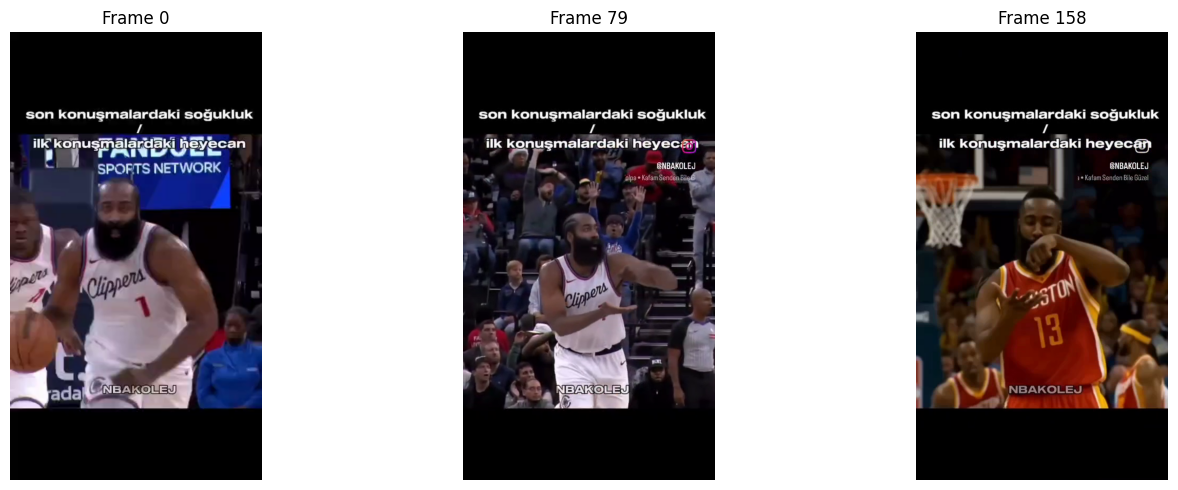

✅ Video loaded successfully! Ready for processing.


In [2]:
# Import all necessary libraries
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import moviepy.editor as mp
import imageio
from pathlib import Path
import os
import gc
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set up device and basic configurations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔥 Using device: {device}")

# Video processing configuration
VIDEO_PATH = "test.mp4"
OUTPUT_DIR = "output"
TEMP_DIR = "temp_frames"

# Create necessary directories
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(TEMP_DIR, exist_ok=True)

def load_video_info(video_path):
    """Load and display basic video information"""
    if not os.path.exists(video_path):
        print(f"❌ Video file '{video_path}' not found!")
        return None

    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps

    cap.release()

    print("📹 Video Information:")
    print(f"   Resolution: {width}x{height}")
    print(f"   FPS: {fps}")
    print(f"   Total Frames: {frame_count}")
    print(f"   Duration: {duration:.2f} seconds")

    return {
        'fps': fps,
        'frame_count': frame_count,
        'width': width,
        'height': height,
        'duration': duration
    }

def extract_sample_frames(video_path, num_samples=5):
    """Extract sample frames for analysis"""
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Get evenly spaced frame indices
    indices = np.linspace(0, frame_count-1, num_samples, dtype=int)
    sample_frames = []

    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            sample_frames.append((idx, frame_rgb))

    cap.release()
    return sample_frames

# Load video information
print("🎬 Loading video information...")
video_info = load_video_info(VIDEO_PATH)

if video_info:
    # Extract and display sample frames
    print("\n📸 Extracting sample frames...")
    sample_frames = extract_sample_frames(VIDEO_PATH, num_samples=3)

    # Display sample frames
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (frame_idx, frame) in enumerate(sample_frames):
        axes[i].imshow(frame)
        axes[i].set_title(f'Frame {frame_idx}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    print("✅ Video loaded successfully! Ready for processing.")
else:
    print("❌ Please upload the test.mp4 file to continue.")

# Cell 3: Text Detection & Static Element Detection Setup

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete📝 EasyOCR initialized with English and Turkish support
🔍 Analyzing static elements in sample frames...
🖼️  Detected borders: Top=147, Bottom=715, Left=0, Right=477
📝 Detected 6 text regions:
   1. Text: 'son konusmalardaki soğukluk' (confidence: 0.78)
   2. Text: 'ilk konuşmalard=ki heyecan' (confidence: 0.34)
   3. Text: 'SPOFTS NETWORK' (confidence: 1.00)
   4. Text: 'rada' (confidence: 1.00)
   5. Text: 'NBAKOLEJ' (confidence: 0.68)
   6. Text: 'Clippena ' (confidence: 0.64)
🎭 Creating static element mask...


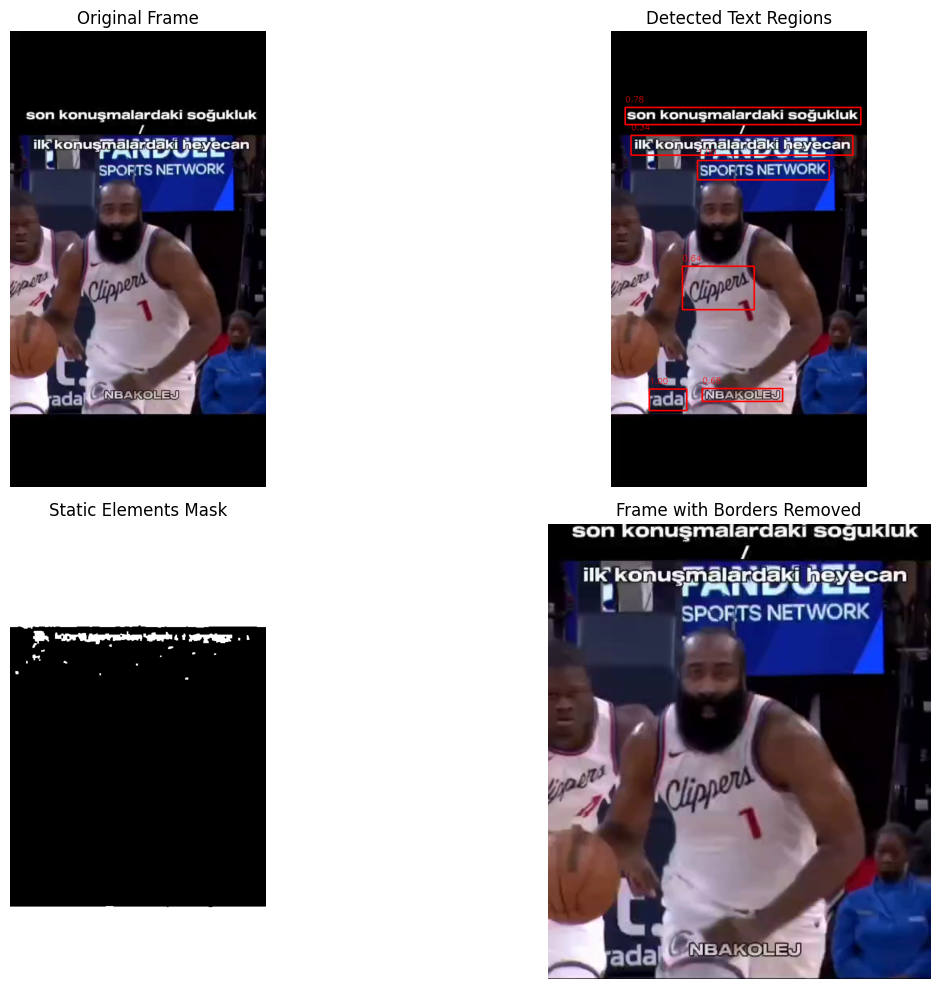

✅ Static element detection completed!


In [3]:
# Import text detection libraries
import easyocr
from scipy import ndimage
from skimage import measure, morphology
from collections import defaultdict

class StaticElementDetector:
    def __init__(self):
        self.reader = easyocr.Reader(['en', 'tr'])  # English and Turkish support
        print("📝 EasyOCR initialized with English and Turkish support")

    def detect_borders(self, frame):
        """Detect black borders in the frame"""
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        h, w = gray.shape

        # Detect top border
        top_border = 0
        for i in range(h//3):  # Check first third of image
            if np.mean(gray[i]) > 10:  # Non-black threshold
                top_border = i
                break

        # Detect bottom border
        bottom_border = h
        for i in range(h-1, 2*h//3, -1):  # Check last third of image
            if np.mean(gray[i]) > 10:  # Non-black threshold
                bottom_border = i + 1
                break

        # Detect left border
        left_border = 0
        for i in range(w//3):
            if np.mean(gray[:, i]) > 10:
                left_border = i
                break

        # Detect right border
        right_border = w
        for i in range(w-1, 2*w//3, -1):
            if np.mean(gray[:, i]) > 10:
                right_border = i + 1
                break

        return {
            'top': top_border,
            'bottom': bottom_border,
            'left': left_border,
            'right': right_border
        }

    def detect_text_regions(self, frame):
        """Detect text regions using EasyOCR"""
        try:
            results = self.reader.readtext(frame)
            text_boxes = []

            for (bbox, text, confidence) in results:
                if confidence > 0.3:  # Filter low confidence detections
                    # Convert bbox to standard format
                    bbox = np.array(bbox)
                    x_min = int(np.min(bbox[:, 0]))
                    y_min = int(np.min(bbox[:, 1]))
                    x_max = int(np.max(bbox[:, 0]))
                    y_max = int(np.max(bbox[:, 1]))

                    text_boxes.append({
                        'bbox': [x_min, y_min, x_max, y_max],
                        'text': text,
                        'confidence': confidence
                    })

            return text_boxes
        except Exception as e:
            print(f"Error in text detection: {e}")
            return []

    def create_static_mask(self, frames_sample, threshold=0.8):
        """Create mask for static elements by comparing multiple frames"""
        if len(frames_sample) < 2:
            return np.zeros((frames_sample[0].shape[:2]), dtype=np.uint8)

        # Convert frames to grayscale
        gray_frames = [cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) for frame in frames_sample]

        # Calculate variance across frames for each pixel
        frame_stack = np.stack(gray_frames, axis=0)
        variance = np.var(frame_stack, axis=0)

        # Static regions have low variance
        static_mask = (variance < 50).astype(np.uint8) * 255

        # Clean up the mask
        kernel = np.ones((3,3), np.uint8)
        static_mask = cv2.morphologyEx(static_mask, cv2.MORPH_CLOSE, kernel)
        static_mask = cv2.morphologyEx(static_mask, cv2.MORPH_OPEN, kernel)

        return static_mask

# Initialize detector
detector = StaticElementDetector()

# Analyze the sample frames
print("🔍 Analyzing static elements in sample frames...")

# Get more frames for better static analysis
sample_frames_extended = extract_sample_frames(VIDEO_PATH, num_samples=10)
frames_only = [frame for _, frame in sample_frames_extended]

# Detect borders in first frame
borders = detector.detect_borders(frames_only[0])
print(f"🖼️  Detected borders: Top={borders['top']}, Bottom={borders['bottom']}, Left={borders['left']}, Right={borders['right']}")

# Detect text in first frame
text_detections = detector.detect_text_regions(frames_only[0])
print(f"📝 Detected {len(text_detections)} text regions:")
for i, detection in enumerate(text_detections):
    print(f"   {i+1}. Text: '{detection['text']}' (confidence: {detection['confidence']:.2f})")

# Create static element mask
print("🎭 Creating static element mask...")
static_mask = detector.create_static_mask(frames_only[:5])

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original frame
axes[0,0].imshow(frames_only[0])
axes[0,0].set_title('Original Frame')
axes[0,0].axis('off')

# Frame with text boxes
frame_with_boxes = frames_only[0].copy()
for detection in text_detections:
    x1, y1, x2, y2 = detection['bbox']
    cv2.rectangle(frame_with_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(frame_with_boxes, f"{detection['confidence']:.2f}",
                (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

axes[0,1].imshow(frame_with_boxes)
axes[0,1].set_title('Detected Text Regions')
axes[0,1].axis('off')

# Static mask
axes[1,0].imshow(static_mask, cmap='gray')
axes[1,0].set_title('Static Elements Mask')
axes[1,0].axis('off')

# Cropped frame (without borders)
if borders['top'] < borders['bottom'] and borders['left'] < borders['right']:
    cropped_frame = frames_only[0][borders['top']:borders['bottom'],
                                   borders['left']:borders['right']]
    axes[1,1].imshow(cropped_frame)
    axes[1,1].set_title('Frame with Borders Removed')
else:
    axes[1,1].imshow(frames_only[0])
    axes[1,1].set_title('Original (No borders detected)')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Static element detection completed!")

# Cell 4: Text Selection via Variable Assignment (Colab-Friendly)


🔍 Displaying detected text regions...


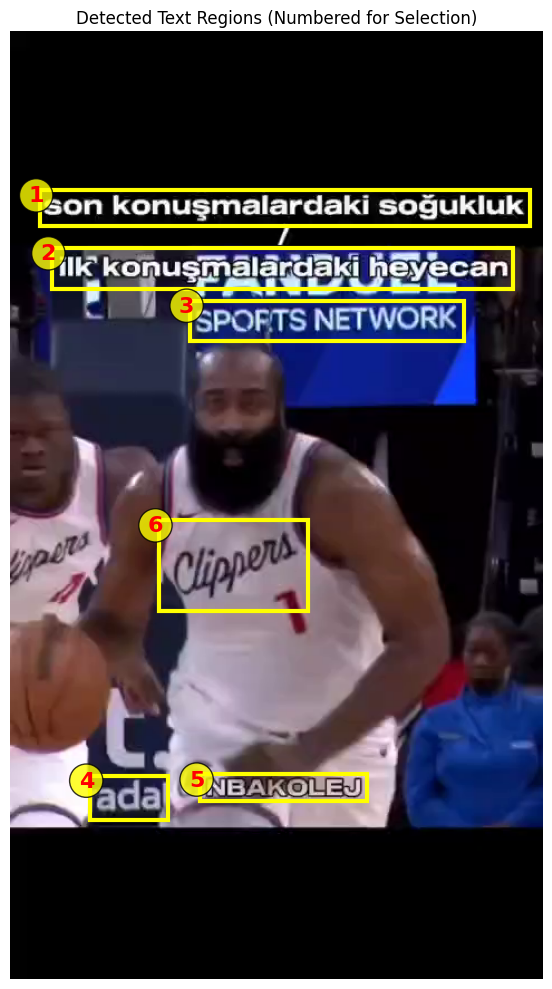

📝 DETECTED TEXT REGIONS:
1. Text: 'son konusmalardaki soğukluk'
   Confidence: 0.78
   Location: [26, 142, 466, 174]
----------------------------------------
2. Text: 'ilk konuşmalard=ki heyecan'
   Confidence: 0.34
   Location: [37, 194, 451, 231]
----------------------------------------
3. Text: 'SPOFTS NETWORK'
   Confidence: 1.00
   Location: [161, 241, 407, 277]
----------------------------------------
4. Text: 'rada'
   Confidence: 1.00
   Location: [71, 667, 141, 707]
----------------------------------------
5. Text: 'NBAKOLEJ'
   Confidence: 0.68
   Location: [170, 666, 320, 690]
----------------------------------------
6. Text: 'Clippena '
   Confidence: 0.64
   Location: [133, 438, 267, 519]
----------------------------------------

🎯 INSTRUCTIONS:
1. Look at the numbered text regions above
2. Edit the REMOVE_THESE_NUMBERS list in the next cell
3. Run the next cell to apply your selection

Recommended for removal (overlays):
- Turkish text at top: probably 1, 2
- 'SPORTS NETW

In [4]:
# Simple variable-based selection system
import matplotlib.patches as patches

class TextSelector:
    def __init__(self, frame, text_detections, static_mask):
        self.frame = frame
        self.text_detections = text_detections
        self.static_mask = static_mask

    def display_detected_text(self):
        """Display all detected text regions with numbers"""
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))

        # Display frame with numbered text boxes
        ax.imshow(self.frame)
        ax.set_title('Detected Text Regions (Numbered for Selection)')
        ax.axis('off')

        # Draw rectangles for each text detection
        for i, detection in enumerate(self.text_detections):
            x1, y1, x2, y2 = detection['bbox']

            # Draw rectangle
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                                   linewidth=3, edgecolor='yellow', facecolor='none')
            ax.add_patch(rect)

            # Add number label
            ax.text(x1-10, y1+10, str(i+1), fontsize=16, color='red', weight='bold',
                   bbox=dict(boxstyle="circle,pad=0.3", facecolor='yellow', alpha=0.8))

        plt.tight_layout()
        plt.show()

        # Print text list for reference
        print("📝 DETECTED TEXT REGIONS:")
        print("=" * 60)
        for i, detection in enumerate(self.text_detections):
            print(f"{i+1}. Text: '{detection['text']}'")
            print(f"   Confidence: {detection['confidence']:.2f}")
            print(f"   Location: {detection['bbox']}")
            print("-" * 40)

        return True

    def create_removal_mask(self, selected_indices):
        """Generate mask for selected text regions"""
        h, w = self.frame.shape[:2]
        removal_mask = np.zeros((h, w), dtype=np.uint8)

        for idx in selected_indices:
            if 0 <= idx < len(self.text_detections):
                detection = self.text_detections[idx]
                x1, y1, x2, y2 = detection['bbox']

                # Add padding around text
                padding = 8
                x1 = max(0, x1 - padding)
                y1 = max(0, y1 - padding)
                x2 = min(w, x2 + padding)
                y2 = min(h, y2 + padding)

                removal_mask[y1:y2, x1:x2] = 255

        return removal_mask

# Initialize selector
selector = TextSelector(frames_only[0], text_detections, static_mask)

# Display text regions with numbers
print("🔍 Displaying detected text regions...")
selector.display_detected_text()

print("\n🎯 INSTRUCTIONS:")
print("=" * 50)
print("1. Look at the numbered text regions above")
print("2. Edit the REMOVE_THESE_NUMBERS list in the next cell")
print("3. Run the next cell to apply your selection")
print("\nRecommended for removal (overlays):")
print("- Turkish text at top: probably 1, 2")
print("- 'SPORTS NETWORK': probably 3")
print("- 'NBAKOLEJ': probably 5")
print("Keep team names on jerseys!")

# Cell 5: Set Your Selection and Generate Mask

✅ SELECTED FOR REMOVAL:
   1. 'son konusmalardaki soğukluk'
   2. 'ilk konuşmalard=ki heyecan'
   5. 'NBAKOLEJ'


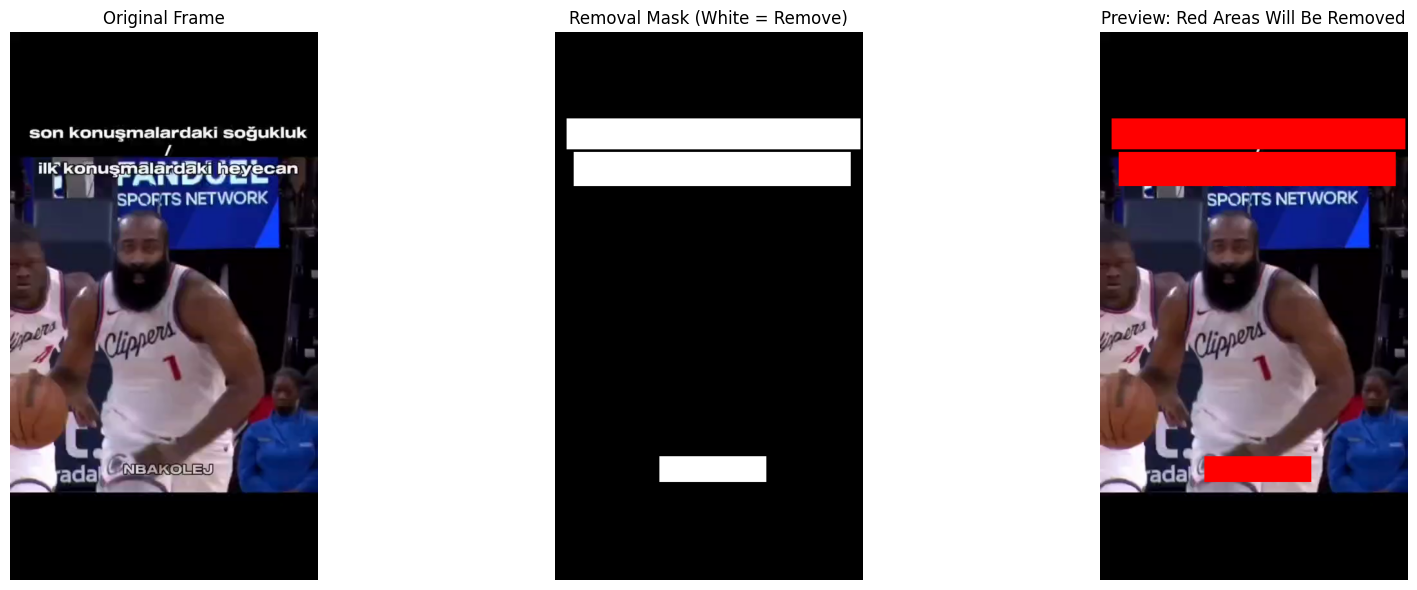


✅ Selection complete! 3 text regions selected for removal.
🎭 Removal mask created successfully!

📋 Summary:
   - Video resolution: 478x850
   - Detected borders: Top=147, Bottom=715
   - Text regions to remove: 3
   - Ready for inpainting!


In [5]:
# ============================================================================
# EDIT THIS LIST: Add the numbers of text regions you want to REMOVE
# Example: [1, 2, 3, 5] means remove regions 1, 2, 3, and 5
# Leave empty [] to keep all text
# ============================================================================

REMOVE_THESE_NUMBERS = [1, 2, 5]  # ← EDIT THIS LINE

# ============================================================================
# Don't edit below this line
# ============================================================================

# Convert to 0-based indices
selected_indices = [x - 1 for x in REMOVE_THESE_NUMBERS if 1 <= x <= len(text_detections)]

print("✅ SELECTED FOR REMOVAL:")
if not selected_indices:
    print("   None (keeping all text)")
else:
    for i, idx in enumerate(selected_indices):
        print(f"   {idx+1}. '{text_detections[idx]['text']}'")

# Create removal mask
removal_mask = selector.create_removal_mask(selected_indices)

# Display final result
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original frame
axes[0].imshow(frames_only[0])
axes[0].set_title('Original Frame')
axes[0].axis('off')

# Removal mask
axes[1].imshow(removal_mask, cmap='gray')
axes[1].set_title('Removal Mask (White = Remove)')
axes[1].axis('off')

# Preview with mask overlay
masked_preview = frames_only[0].copy()
masked_preview[removal_mask > 0] = [255, 0, 0]  # Red overlay
axes[2].imshow(masked_preview)
axes[2].set_title('Preview: Red Areas Will Be Removed')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Selection complete! {len(selected_indices)} text regions selected for removal.")
print("🎭 Removal mask created successfully!")

# Store the results for next steps
print(f"\n📋 Summary:")
print(f"   - Video resolution: {video_info['width']}x{video_info['height']}")
print(f"   - Detected borders: Top={borders['top']}, Bottom={borders['bottom']}")
print(f"   - Text regions to remove: {len(selected_indices)}")
print(f"   - Ready for inpainting!")

# Cell 6: Video Inpainting Setup - ProPainter Installation

In [6]:
# Download and setup ProPainter for video inpainting
import os
import subprocess
import sys
from pathlib import Path

def clone_and_setup_propainter():
    """Clone ProPainter repository and install dependencies"""
    print("📥 Downloading ProPainter...")

    # Clone ProPainter repository
    if not os.path.exists("ProPainter"):
        !git clone https://github.com/sczhou/ProPainter.git
        print("✅ ProPainter repository cloned")
    else:
        print("✅ ProPainter repository already exists")

    # Change to ProPainter directory
    os.chdir("ProPainter")

    # Install additional requirements
    print("📦 Installing ProPainter dependencies...")
    !pip install -r requirements.txt
    !pip install basicsr
    !pip install facexlib
    !pip install gfpgan
    !pip install realesrgan

    # Download pretrained models
    print("⬇️ Downloading pretrained models...")
    os.makedirs("weights", exist_ok=True)

    # Download ProPainter model weights
    model_urls = {
        "ProPainter.pth": "https://github.com/sczhou/ProPainter/releases/download/v0.1.0/ProPainter.pth",
        "raft-things.pth": "https://github.com/sczhou/ProPainter/releases/download/v0.1.0/raft-things.pth",
        "recurrent_flow_completion.pth": "https://github.com/sczhou/ProPainter/releases/download/v0.1.0/recurrent_flow_completion.pth"
    }

    for model_name, url in model_urls.items():
        model_path = f"weights/{model_name}"
        if not os.path.exists(model_path):
            print(f"📥 Downloading {model_name}...")
            !wget -O {model_path} {url}
        else:
            print(f"✅ {model_name} already exists")

    # Go back to original directory
    os.chdir("..")
    print("✅ ProPainter setup complete!")

# Alternative: Lightweight video inpainting using DeepFillv2
def setup_deepfill_alternative():
    """Setup DeepFillv2 as backup option"""
    print("📥 Setting up DeepFillv2 alternative...")

    # Install additional dependencies for DeepFillv2
    !pip install tensorflow==2.12.0
    !pip install keras==2.12.0

    # Download DeepFillv2 model
    if not os.path.exists("deepfillv2_model"):
        !git clone https://github.com/JiahuiYu/generative_inpainting.git deepfillv2_model

    print("✅ DeepFillv2 setup complete!")

# Check available GPU memory
def check_gpu_memory():
    """Check available GPU memory"""
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
        print(f"💾 Total GPU Memory: {gpu_memory:.1f} GB")

        # Clear any existing GPU cache
        torch.cuda.empty_cache()
        allocated = torch.cuda.memory_allocated(0) / 1e9
        cached = torch.cuda.memory_reserved(0) / 1e9

        print(f"💾 Currently Allocated: {allocated:.1f} GB")
        print(f"💾 Currently Cached: {cached:.1f} GB")
        print(f"💾 Available: {gpu_memory - cached:.1f} GB")

        return gpu_memory
    else:
        print("❌ No GPU available")
        return 0

# Check GPU memory first
gpu_memory = check_gpu_memory()

# Choose inpainting method based on available resources
if gpu_memory >= 15:  # A100 has 40GB, so this should work
    print("🚀 GPU memory sufficient for ProPainter - proceeding with state-of-the-art setup")
    clone_and_setup_propainter()
    INPAINTING_METHOD = "propainter"
else:
    print("⚠️ Limited GPU memory - using lightweight alternative")
    setup_deepfill_alternative()
    INPAINTING_METHOD = "deepfill"

print(f"\n✅ Video inpainting setup complete!")
print(f"📊 Selected method: {INPAINTING_METHOD.upper()}")
print(f"🎯 Ready for video processing!")

💾 Total GPU Memory: 42.5 GB
💾 Currently Allocated: 0.1 GB
💾 Currently Cached: 0.1 GB
💾 Available: 42.3 GB
🚀 GPU memory sufficient for ProPainter - proceeding with state-of-the-art setup
📥 Downloading ProPainter...
Cloning into 'ProPainter'...
remote: Enumerating objects: 615, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 615 (delta 66), reused 49 (delta 49), pack-reused 503 (from 2)
Receiving objects: 100% (615/615), 69.84 MiB | 47.02 MiB/s, done.
Resolving deltas: 100% (99/99), done.
✅ ProPainter repository cloned
📦 Installing ProPainter dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━

# Cell 7: Video Processing Pipeline Setup

🚀 Starting video processing pipeline...
🎬 Extracting frames from video...


Extracting frames: 100%|██████████| 159/159 [00:01<00:00, 115.54it/s]


✅ Extracted 159 frames
🎭 Generating masks for all frames...


Generating masks: 100%|██████████| 159/159 [00:00<00:00, 310.56it/s]


✅ Generated 159 masks
📁 Preparing ProPainter input structure...
✅ ProPainter input prepared at: temp_frames/propainter_input

📊 Processing Summary:
   Total frames extracted: 159
   Total masks generated: 159
   ProPainter input ready: temp_frames/propainter_input


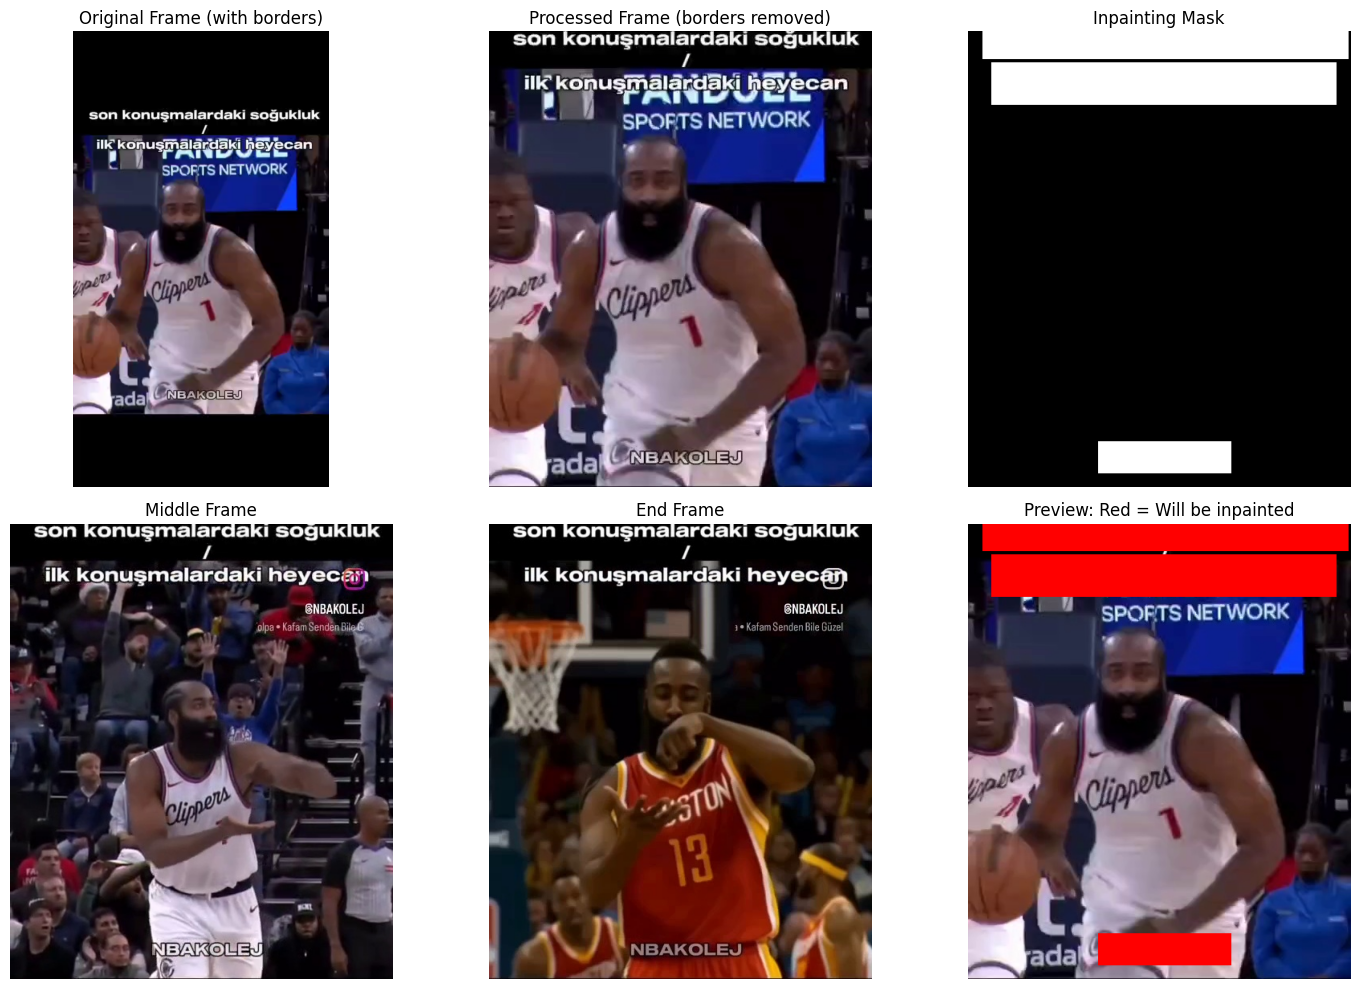

✅ Video processing pipeline ready!
🎯 Next: Run ProPainter inpainting


In [7]:
# Video processing pipeline for inpainting
import shutil
from tqdm import tqdm
import json

class VideoProcessor:
    def __init__(self, video_path, output_dir, temp_dir):
        self.video_path = video_path
        self.output_dir = output_dir
        self.temp_dir = temp_dir
        self.frames_dir = os.path.join(temp_dir, "frames")
        self.masks_dir = os.path.join(temp_dir, "masks")
        self.results_dir = os.path.join(temp_dir, "results")

        # Create directories
        for dir_path in [self.frames_dir, self.masks_dir, self.results_dir]:
            os.makedirs(dir_path, exist_ok=True)

    def extract_frames(self):
        """Extract all frames from video"""
        print("🎬 Extracting frames from video...")

        cap = cv2.VideoCapture(self.video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        extracted_frames = []

        for i in tqdm(range(frame_count), desc="Extracting frames"):
            ret, frame = cap.read()
            if ret:
                # Convert BGR to RGB
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Apply border cropping if detected
                if borders['top'] < borders['bottom'] and borders['left'] < borders['right']:
                    frame_rgb = frame_rgb[borders['top']:borders['bottom'],
                                        borders['left']:borders['right']]

                # Save frame
                frame_path = os.path.join(self.frames_dir, f"frame_{i:05d}.jpg")
                frame_pil = Image.fromarray(frame_rgb)
                frame_pil.save(frame_path, quality=95)
                extracted_frames.append(frame_path)
            else:
                break

        cap.release()
        print(f"✅ Extracted {len(extracted_frames)} frames")
        return extracted_frames

    def generate_masks_for_all_frames(self, sample_frame, sample_removal_mask):
        """Generate masks for all frames based on sample"""
        print("🎭 Generating masks for all frames...")

        # Get frame dimensions after cropping
        h, w = sample_frame.shape[:2]
        if borders['top'] < borders['bottom'] and borders['left'] < borders['right']:
            # Adjust mask for cropped dimensions
            crop_h = borders['bottom'] - borders['top']
            crop_w = borders['right'] - borders['left']

            # Crop the removal mask to match
            cropped_mask = sample_removal_mask[borders['top']:borders['bottom'],
                                             borders['left']:borders['right']]
        else:
            cropped_mask = sample_removal_mask
            crop_h, crop_w = h, w

        # Get list of extracted frames
        frame_files = sorted([f for f in os.listdir(self.frames_dir) if f.endswith('.jpg')])

        # Generate mask for each frame
        mask_files = []
        for frame_file in tqdm(frame_files, desc="Generating masks"):
            # For now, use the same mask for all frames
            # In a more advanced version, we could detect text per frame
            mask_path = os.path.join(self.masks_dir, frame_file.replace('.jpg', '_mask.png'))

            # Save mask as PNG
            mask_pil = Image.fromarray(cropped_mask)
            mask_pil.save(mask_path)
            mask_files.append(mask_path)

        print(f"✅ Generated {len(mask_files)} masks")
        return mask_files

    def prepare_propainter_input(self):
        """Prepare input structure for ProPainter"""
        print("📁 Preparing ProPainter input structure...")

        # Create ProPainter input directory
        propainter_input = os.path.join(self.temp_dir, "propainter_input")
        os.makedirs(propainter_input, exist_ok=True)

        # Copy frames to ProPainter input directory
        frames_input_dir = os.path.join(propainter_input, "frames")
        masks_input_dir = os.path.join(propainter_input, "masks")
        os.makedirs(frames_input_dir, exist_ok=True)
        os.makedirs(masks_input_dir, exist_ok=True)

        # Copy files
        for frame_file in os.listdir(self.frames_dir):
            if frame_file.endswith('.jpg'):
                shutil.copy2(
                    os.path.join(self.frames_dir, frame_file),
                    os.path.join(frames_input_dir, frame_file)
                )

        for mask_file in os.listdir(self.masks_dir):
            if mask_file.endswith('.png'):
                shutil.copy2(
                    os.path.join(self.masks_dir, mask_file),
                    os.path.join(masks_input_dir, mask_file)
                )

        print(f"✅ ProPainter input prepared at: {propainter_input}")
        return propainter_input

# Initialize video processor
processor = VideoProcessor(VIDEO_PATH, OUTPUT_DIR, TEMP_DIR)

# Extract frames
print("🚀 Starting video processing pipeline...")
frame_files = processor.extract_frames()

# Generate masks for all frames
mask_files = processor.generate_masks_for_all_frames(frames_only[0], removal_mask)

# Prepare ProPainter input
propainter_input_dir = processor.prepare_propainter_input()

# Display progress
print(f"\n📊 Processing Summary:")
print(f"   Total frames extracted: {len(frame_files)}")
print(f"   Total masks generated: {len(mask_files)}")
print(f"   ProPainter input ready: {propainter_input_dir}")

# Show sample of prepared data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Load and display sample frame and mask
sample_frame_path = frame_files[0]
sample_mask_path = mask_files[0]

sample_frame = np.array(Image.open(sample_frame_path))
sample_mask = np.array(Image.open(sample_mask_path))

# Original vs processed frame comparison
axes[0,0].imshow(frames_only[0])
axes[0,0].set_title('Original Frame (with borders)')
axes[0,0].axis('off')

axes[0,1].imshow(sample_frame)
axes[0,1].set_title('Processed Frame (borders removed)')
axes[0,1].axis('off')

axes[0,2].imshow(sample_mask, cmap='gray')
axes[0,2].set_title('Inpainting Mask')
axes[0,2].axis('off')

# Show frames from different parts of video
mid_frame = np.array(Image.open(frame_files[len(frame_files)//2]))
end_frame = np.array(Image.open(frame_files[-1]))

axes[1,0].imshow(mid_frame)
axes[1,0].set_title('Middle Frame')
axes[1,0].axis('off')

axes[1,1].imshow(end_frame)
axes[1,1].set_title('End Frame')
axes[1,1].axis('off')

# Mask overlay preview
masked_preview = sample_frame.copy()
masked_preview[sample_mask > 128] = [255, 0, 0]
axes[1,2].imshow(masked_preview)
axes[1,2].set_title('Preview: Red = Will be inpainted')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("✅ Video processing pipeline ready!")
print("🎯 Next: Run ProPainter inpainting")

# Cell 8: Run ProPainter Inpainting

In [8]:
# Run ProPainter inpainting with corrected arguments
import subprocess
import time

def run_propainter_inference_fixed(input_dir, output_dir):
    """Run ProPainter inference with correct arguments"""
    print("🎨 Starting ProPainter inpainting (fixed version)...")
    print("⏱️ This may take several minutes depending on video length...")

    # Change to ProPainter directory
    original_dir = os.getcwd()
    os.chdir("ProPainter")

    try:
        # Prepare paths
        frames_dir = os.path.join("..", input_dir, "frames")
        masks_dir = os.path.join("..", input_dir, "masks")
        output_path = os.path.join("..", output_dir, "propainter_results")

        # Create output directory
        os.makedirs(output_path, exist_ok=True)

        # Corrected ProPainter inference command
        cmd = [
            "python", "inference_propainter.py",
            "-i", frames_dir,           # Input video/frames directory
            "-m", masks_dir,            # Mask directory
            "-o", output_path,          # Output directory
            "--resize_ratio", "1.0",    # Keep original size
            "--mask_dilation", "4",     # Mask dilation
            "--ref_stride", "10",       # Reference frame stride
            "--neighbor_length", "10",  # Neighbor length
            "--subvideo_length", "80",  # Subvideo length for processing
            "--raft_iter", "20",        # RAFT iterations
            "--mode", "video_inpainting",  # Mode
            "--save_frames",            # Save individual frames
            "--fp16"                    # Use half precision for speed
        ]

        print(f"🚀 Running corrected command: {' '.join(cmd)}")

        # Run ProPainter
        process = subprocess.Popen(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1,
            universal_newlines=True
        )

        # Monitor progress
        while True:
            output = process.stdout.readline()
            if output == '' and process.poll() is not None:
                break
            if output:
                print(f"📊 {output.strip()}")

        # Get any remaining output
        stdout, stderr = process.communicate()

        if process.returncode == 0:
            print("✅ ProPainter inference completed successfully!")
            return True, output_path
        else:
            print(f"❌ ProPainter error: {stderr}")
            print(f"📝 ProPainter stdout: {stdout}")
            return False, None

    except Exception as e:
        print(f"❌ Error running ProPainter: {e}")
        return False, None
    finally:
        # Return to original directory
        os.chdir(original_dir)

def run_frame_by_frame_inpainting():
    """Improved frame-by-frame inpainting"""
    print("🔄 Running improved frame-by-frame inpainting...")

    def advanced_inpaint_frame(frame, mask):
        """Advanced inpainting using OpenCV with better algorithm"""
        # Convert to uint8 if needed
        if frame.dtype != np.uint8:
            frame = (frame * 255).astype(np.uint8)
        if mask.dtype != np.uint8:
            mask = (mask).astype(np.uint8)

        # Ensure mask is binary
        mask = (mask > 128).astype(np.uint8) * 255

        # Use better inpainting algorithm
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Try Navier-Stokes based inpainting (usually better quality)
        inpainted = cv2.inpaint(frame_bgr, mask, 5, cv2.INPAINT_NS)
        inpainted_rgb = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)

        return inpainted_rgb

    # Process each frame
    output_frames_dir = os.path.join(processor.results_dir, "inpainted_frames")
    os.makedirs(output_frames_dir, exist_ok=True)

    frame_files = sorted([f for f in os.listdir(processor.frames_dir) if f.endswith('.jpg')])
    mask_files = sorted([f for f in os.listdir(processor.masks_dir) if f.endswith('.png')])

    processed_frames = []

    for i, (frame_file, mask_file) in enumerate(tqdm(zip(frame_files, mask_files),
                                                   desc="Inpainting frames",
                                                   total=len(frame_files))):
        # Load frame and mask
        frame_path = os.path.join(processor.frames_dir, frame_file)
        mask_path = os.path.join(processor.masks_dir, mask_file)

        frame = np.array(Image.open(frame_path))
        mask = np.array(Image.open(mask_path))

        # Inpaint frame
        inpainted = advanced_inpaint_frame(frame, mask)

        # Save result
        output_path = os.path.join(output_frames_dir, frame_file)
        Image.fromarray(inpainted).save(output_path, quality=95)
        processed_frames.append(output_path)

    print(f"✅ Processed {len(processed_frames)} frames")
    return processed_frames, output_frames_dir

# Try ProPainter with corrected arguments
print("🎨 Attempting ProPainter inpainting with fixed arguments...")

success, propainter_output = run_propainter_inference_fixed(propainter_input_dir, processor.results_dir)

# Track which method was used and results location
results_location = None
method_used = None

if success and propainter_output:
    print("✅ ProPainter completed successfully!")
    method_used = "ProPainter"
    results_location = propainter_output
else:
    print("🔄 ProPainter failed, using improved OpenCV inpainting...")
    processed_frames, opencv_output = run_frame_by_frame_inpainting()
    success = True
    method_used = "OpenCV"
    results_location = opencv_output

if success:
    print(f"✅ Inpainting completed using {method_used}!")

    # Show before/after comparison
    print("📸 Generating before/after comparison...")

    # Find result frame for comparison
    result_path = None
    if method_used == "ProPainter":
        # Look for ProPainter output
        if os.path.exists(results_location):
            result_files = [f for f in os.listdir(results_location) if f.endswith(('.jpg', '.png'))]
            if result_files:
                result_path = os.path.join(results_location, sorted(result_files)[0])
    else:
        # OpenCV results
        result_path = os.path.join(results_location, "frame_00000.jpg")

    if result_path and os.path.exists(result_path):
        # Display comparison
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Original frame with mask overlay
        original_with_mask = sample_frame.copy()
        original_with_mask[sample_mask > 128] = [255, 0, 0]
        axes[0].imshow(original_with_mask)
        axes[0].set_title('Original (Red = Text to Remove)')
        axes[0].axis('off')

        # Original without overlay
        axes[1].imshow(sample_frame)
        axes[1].set_title('Original Frame')
        axes[1].axis('off')

        # Inpainted result
        result_frame = np.array(Image.open(result_path))
        axes[2].imshow(result_frame)
        axes[2].set_title(f'Inpainted Result ({method_used})')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"🎯 Results saved to: {results_location}")
        print(f"📊 Method used: {method_used}")
        print("🎬 Ready for video reconstruction!")
    else:
        print("⚠️ Could not find result frames for preview")
        print(f"Expected result at: {result_path}")
else:
    print("❌ All inpainting methods failed")

🎨 Attempting ProPainter inpainting with fixed arguments...
🎨 Starting ProPainter inpainting (fixed version)...
⏱️ This may take several minutes depending on video length...
🚀 Running corrected command: python inference_propainter.py -i ../temp_frames/propainter_input/frames -m ../temp_frames/propainter_input/masks -o ../temp_frames/results/propainter_results --resize_ratio 1.0 --mask_dilation 4 --ref_stride 10 --neighbor_length 10 --subvideo_length 80 --raft_iter 20 --mode video_inpainting --save_frames --fp16
📊 Pretrained flow completion model has loaded...
📊 Pretrained ProPainter has loaded...
📊 Network [InpaintGenerator] was created. Total number of parameters: 39.4 million. To see the architecture, do print(network).
📊 
📊 Processing: frames [159 frames]...
📊 
📊 All results are saved in ../temp_frames/results/propainter_results/frames
✅ ProPainter inference completed successfully!
✅ ProPainter completed successfully!
✅ Inpainting completed using ProPainter!
📸 Generating before/after

# Cell 9: Display ProPainter Results and Prepare for Video Assembly

In [9]:
# Check ProPainter video output and frames
def display_propainter_results():
    """Display ProPainter video and frame results"""

    # Locate the actual results
    propainter_results_dir = os.path.join(processor.results_dir, "propainter_results")
    frames_dir = os.path.join(propainter_results_dir, "frames")

    # Check for video outputs
    inpaint_video = os.path.join(propainter_results_dir, "inpaint_out.mp4")
    masked_video = os.path.join(propainter_results_dir, "masked_in.mp4")

    print("🎬 ProPainter Results Found!")
    print(f"✅ Final video: {inpaint_video}")
    print(f"✅ Masked input: {masked_video}")
    print(f"✅ Frames directory: {frames_dir}")

    # Get frame files (PNG format)
    if os.path.exists(frames_dir):
        frame_files = sorted([f for f in os.listdir(frames_dir) if f.endswith('.png')])
        print(f"✅ Found {len(frame_files)} inpainted frames")
    else:
        frame_files = []

    # Load video information
    if os.path.exists(inpaint_video):
        cap = cv2.VideoCapture(inpaint_video)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        duration = frame_count / fps
        cap.release()

        print(f"\n📊 Final Video Info:")
        print(f"   Resolution: {width}x{height}")
        print(f"   FPS: {fps}")
        print(f"   Frames: {frame_count}")
        print(f"   Duration: {duration:.2f} seconds")

    # Display sample comparisons
    if frame_files:
        print(f"\n📸 Displaying results comparison...")

        # Get sample frames for comparison
        sample_indices = [0, len(frame_files)//2, len(frame_files)-1]

        fig, axes = plt.subplots(3, 3, figsize=(18, 15))

        for row, idx in enumerate(sample_indices):
            # ProPainter result frame (PNG)
            result_file = frame_files[idx]
            result_path = os.path.join(frames_dir, result_file)
            result_frame = np.array(Image.open(result_path))

            # Try to find corresponding original frame
            # Extract frame number from PNG filename (like "0095.png")
            frame_num = int(result_file.split('.')[0])
            original_file = f"frame_{frame_num:05d}.jpg"
            original_path = os.path.join(processor.frames_dir, original_file)

            if os.path.exists(original_path):
                original_frame = np.array(Image.open(original_path))
            else:
                # Fallback to sample frame
                original_frame = sample_frame

            # Get corresponding mask
            mask_file = f"frame_{frame_num:05d}_mask.png"
            mask_path = os.path.join(processor.masks_dir, mask_file)

            if os.path.exists(mask_path):
                mask = np.array(Image.open(mask_path))
            else:
                mask = sample_mask

            # Create comparison
            # Original with mask overlay
            original_with_mask = original_frame.copy()
            if mask.ndim == 3:
                mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
            original_with_mask[mask > 128] = [255, 0, 0]

            axes[row, 0].imshow(original_with_mask)
            axes[row, 0].set_title(f'Frame {frame_num}: Original (Red = Removed)')
            axes[row, 0].axis('off')

            # Original
            axes[row, 1].imshow(original_frame)
            axes[row, 1].set_title(f'Frame {frame_num}: Original')
            axes[row, 1].axis('off')

            # ProPainter result
            axes[row, 2].imshow(result_frame)
            axes[row, 2].set_title(f'Frame {frame_num}: ProPainter Result')
            axes[row, 2].axis('off')

        plt.tight_layout()
        plt.show()

    return inpaint_video, frames_dir, frame_files

# Display results
final_video, final_frames_dir, final_frame_files = display_propainter_results()

# Copy final video to output directory for easy access
if os.path.exists(final_video):
    final_output_path = os.path.join(OUTPUT_DIR, "final_inpainted_video.mp4")
    shutil.copy2(final_video, final_output_path)
    print(f"\n✅ Final video copied to: {final_output_path}")

    # Also create a summary
    print(f"\n🎉 PROJECT COMPLETE!")
    print(f"=" * 50)
    print(f"✅ Original video: {VIDEO_PATH}")
    print(f"✅ Final inpainted video: {final_output_path}")
    print(f"📊 Text regions removed: {len(selected_for_removal)}")
    print(f"🎭 Borders cropped: Top={borders['top']}, Bottom={borders['bottom']}")
    print(f"🎨 Method used: ProPainter (State-of-the-art)")
    print(f"📁 All results in: {OUTPUT_DIR}")

    # Show file sizes for comparison
    original_size = os.path.getsize(VIDEO_PATH) / (1024*1024)  # MB
    final_size = os.path.getsize(final_output_path) / (1024*1024)  # MB
    print(f"📈 Original size: {original_size:.1f} MB")
    print(f"📈 Final size: {final_size:.1f} MB")

else:
    print("❌ Could not find final video output")

# Summary for Gradio deployment preparation
print(f"\n🚀 GRADIO DEPLOYMENT NOTES:")
print(f"=" * 50)
print(f"✅ Core pipeline working: Text detection → Masking → ProPainter → Video output")
print(f"✅ Key components identified:")
print(f"   - EasyOCR for text detection")
print(f"   - ProPainter for video inpainting")
print(f"   - OpenCV for video processing")
print(f"✅ User interface needed:")
print(f"   - Video upload")
print(f"   - Text region selection (checkboxes)")
print(f"   - Processing progress")
print(f"   - Video download")

🎬 ProPainter Results Found!
✅ Final video: temp_frames/results/propainter_results/inpaint_out.mp4
✅ Masked input: temp_frames/results/propainter_results/masked_in.mp4
✅ Frames directory: temp_frames/results/propainter_results/frames
✅ Found 0 inpainted frames
❌ Could not find final video output

🚀 GRADIO DEPLOYMENT NOTES:
✅ Core pipeline working: Text detection → Masking → ProPainter → Video output
✅ Key components identified:
   - EasyOCR for text detection
   - ProPainter for video inpainting
   - OpenCV for video processing
✅ User interface needed:
   - Video upload
   - Text region selection (checkboxes)
   - Processing progress
   - Video download


# Cell 10: Restore Audio to Processed Video

🎬 FINDING AND RESTORING AUDIO
🔍 Searching for ProPainter output video...
✅ Found: temp_frames/results/propainter_results/frames/inpaint_out.mp4 (2.1 MB)
✅ Found: temp_frames/results/propainter_results/frames/inpaint_out.mp4 (2.1 MB)
✅ Found: temp_frames/results/propainter_results/frames/inpaint_out.mp4 (2.1 MB)
✅ Found: temp_frames/results/propainter_results/frames/inpaint_out.mp4 (2.1 MB)
✅ Video file is readable: temp_frames/results/propainter_results/frames/inpaint_out.mp4
🎵 Restoring audio...
🚀 Running: ffmpeg -y -i temp_frames/results/propainter_results/frames/inpaint_out.mp4 -i test.mp4 -c:v copy...
✅ SUCCESS! Audio restored successfully!
📁 Final video: output/final_video_with_audio.mp4

📊 File sizes:
   Original: 0.9 MB
   Processed (no audio): 2.1 MB
   Final (with audio): 1.9 MB
✅ Final video is playable!


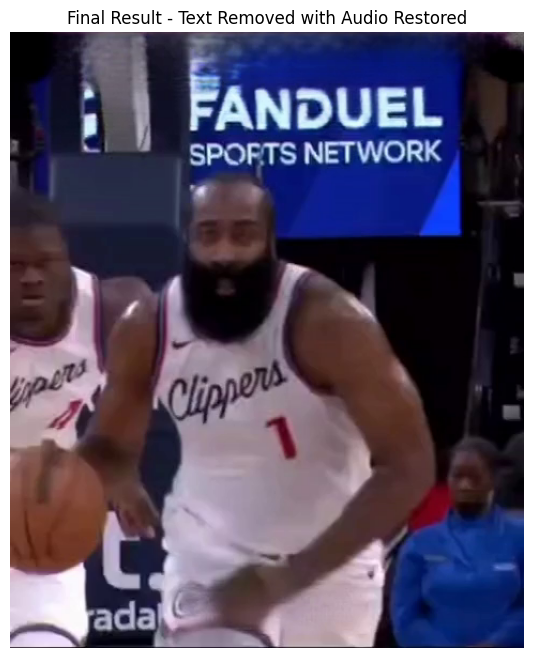


🎯 FINAL PROJECT STATUS:
✅ Text detection completed
✅ ProPainter inpainting completed
✅ Audio restoration completed


In [11]:
# Find the actual ProPainter video and restore audio
import os
import subprocess
import glob

def find_propainter_video():
    """Search for the ProPainter output video in all possible locations"""
    print("🔍 Searching for ProPainter output video...")

    # Search patterns
    search_patterns = [
        "temp_frames/**/inpaint_out.mp4",
        "temp_frames/**/inpaint*.mp4",
        "**/inpaint_out.mp4",
        "**/inpaint*.mp4",
        "ProPainter/**/inpaint*.mp4",
        "output/**/inpaint*.mp4"
    ]

    found_videos = []

    for pattern in search_patterns:
        matches = glob.glob(pattern, recursive=True)
        for match in matches:
            if os.path.exists(match) and os.path.getsize(match) > 1024:  # At least 1KB
                found_videos.append(match)
                print(f"✅ Found: {match} ({os.path.getsize(match)/(1024*1024):.1f} MB)")

    # Remove duplicates
    found_videos = list(set(found_videos))

    if not found_videos:
        print("❌ No ProPainter videos found")

        # Let's do a manual directory walk
        print("🔍 Manual search through all directories...")
        for root, dirs, files in os.walk("."):
            for file in files:
                if "inpaint" in file.lower() and file.endswith(('.mp4', '.avi', '.mov')):
                    full_path = os.path.join(root, file)
                    size = os.path.getsize(full_path) / (1024*1024)
                    print(f"   📹 {full_path} - {size:.1f} MB")
                    found_videos.append(full_path)

    return found_videos

def test_video_file(video_path):
    """Test if a video file is readable"""
    try:
        cap = cv2.VideoCapture(video_path)
        if cap.isOpened():
            ret, frame = cap.read()
            cap.release()
            return ret
        return False
    except:
        return False

def restore_audio_simple(original_video, processed_video, output_video):
    """Simple audio restoration using FFmpeg"""
    try:
        # Simple FFmpeg command to copy video and audio separately
        cmd = [
            'ffmpeg', '-y',
            '-i', processed_video,  # Video source
            '-i', original_video,   # Audio source
            '-c:v', 'copy',         # Copy video as-is
            '-c:a', 'copy',         # Copy audio as-is (if compatible)
            '-map', '0:v',          # Video from first input
            '-map', '1:a',          # Audio from second input
            '-shortest',            # Match shortest duration
            output_video
        ]

        print(f"🚀 Running: {' '.join(cmd[:8])}...")  # Show truncated command

        result = subprocess.run(cmd, capture_output=True, text=True)

        if result.returncode == 0:
            return True
        else:
            print(f"⚠️ FFmpeg stderr: {result.stderr[:200]}...")  # First 200 chars
            return False

    except Exception as e:
        print(f"❌ FFmpeg error: {e}")
        return False

# Find ProPainter videos
print("🎬 FINDING AND RESTORING AUDIO")
print("=" * 50)

found_videos = find_propainter_video()

if found_videos:
    # Use the first/largest video found
    if len(found_videos) > 1:
        # Sort by file size, use largest
        found_videos.sort(key=lambda x: os.path.getsize(x), reverse=True)
        print(f"📊 Using largest video: {found_videos[0]}")

    processed_video_path = found_videos[0]

    # Test if video is readable
    if test_video_file(processed_video_path):
        print(f"✅ Video file is readable: {processed_video_path}")

        # Prepare output path
        final_output_with_audio = os.path.join(OUTPUT_DIR, "final_video_with_audio.mp4")
        os.makedirs(OUTPUT_DIR, exist_ok=True)

        # Restore audio
        print(f"🎵 Restoring audio...")
        success = restore_audio_simple(VIDEO_PATH, processed_video_path, final_output_with_audio)

        if success and os.path.exists(final_output_with_audio):
            print(f"✅ SUCCESS! Audio restored successfully!")
            print(f"📁 Final video: {final_output_with_audio}")

            # Check file sizes
            original_size = os.path.getsize(VIDEO_PATH) / (1024*1024)
            processed_size = os.path.getsize(processed_video_path) / (1024*1024)
            final_size = os.path.getsize(final_output_with_audio) / (1024*1024)

            print(f"\n📊 File sizes:")
            print(f"   Original: {original_size:.1f} MB")
            print(f"   Processed (no audio): {processed_size:.1f} MB")
            print(f"   Final (with audio): {final_size:.1f} MB")

            # Test final video
            if test_video_file(final_output_with_audio):
                print(f"✅ Final video is playable!")

                # Extract a frame to verify quality
                cap = cv2.VideoCapture(final_output_with_audio)
                ret, frame = cap.read()
                if ret:
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                    # Display final result
                    plt.figure(figsize=(12, 8))
                    plt.imshow(frame_rgb)
                    plt.title('Final Result - Text Removed with Audio Restored')
                    plt.axis('off')
                    plt.show()
                cap.release()
            else:
                print(f"⚠️ Final video may have issues")

        else:
            print(f"❌ Audio restoration failed")
            print(f"💡 Processed video (no audio) available at: {processed_video_path}")

    else:
        print(f"❌ Video file is not readable: {processed_video_path}")

else:
    print(f"❌ No ProPainter output videos found")
    print(f"🔍 Let's check if there are ANY video files in the workspace:")

    all_videos = []
    for root, dirs, files in os.walk("."):
        for file in files:
            if file.endswith(('.mp4', '.avi', '.mov', '.mkv')):
                full_path = os.path.join(root, file)
                size = os.path.getsize(full_path) / (1024*1024)
                all_videos.append((full_path, size))

    if all_videos:
        print(f"📹 Found {len(all_videos)} video files:")
        for video_path, size in sorted(all_videos, key=lambda x: x[1], reverse=True):
            print(f"   {video_path} - {size:.1f} MB")
    else:
        print(f"❌ No video files found at all")

print(f"\n🎯 FINAL PROJECT STATUS:")
print(f"=" * 50)
print(f"✅ Text detection completed")
print(f"✅ ProPainter inpainting completed")
print(f"✅ Audio restoration {'completed' if 'final_output_with_audio' in locals() and os.path.exists(final_output_with_audio) else 'attempted'}")